## German Traffic Sign Recognition Benchmark

Kaggle competition ([Link](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign))


Install Kaggle API and Download Dataset 


---



---



In [ ]:
# Run this cell and select the kaggle.json file downloaded from the Kaggle account settings page.

from google.colab import files 
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mkhanmohamadi","key":"1659aeeb4f2b3534fa48c16bdf5a41c0"}'}

In [ ]:
#installing kaggle API for downloading Dataset
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Make folder for Dataset and download it there

---


---


In [ ]:
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign


100% 612M/612M [00:15<00:00, 39.5MB/s]



In [ ]:
  %cd ..

/content


Unzip dataset and remove zip file because disk limitation


---



---



In [ ]:
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip

# Import Libraries 

In [ ]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns 
import random 
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , Dropout , Conv2D , MaxPool2D 

Show train.csv and test.csv for getting more inforamtion


---

---



In [ ]:
TrainCSV = pd.read_csv('/content/traffic_sign_dataset/Train.csv')
(TrainCSV)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png


In [ ]:
TestCSV = pd.read_csv('/content/traffic_sign_dataset/Test.csv')
(TestCSV)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png
12627,29,29,6,6,24,24,6,Test/12627.png
12628,48,49,5,6,43,44,7,Test/12628.png


Show random image of test images


---
Visualizing some images of traffic sign from the test dataset. we can see here that the dimension of images are uneven.


---



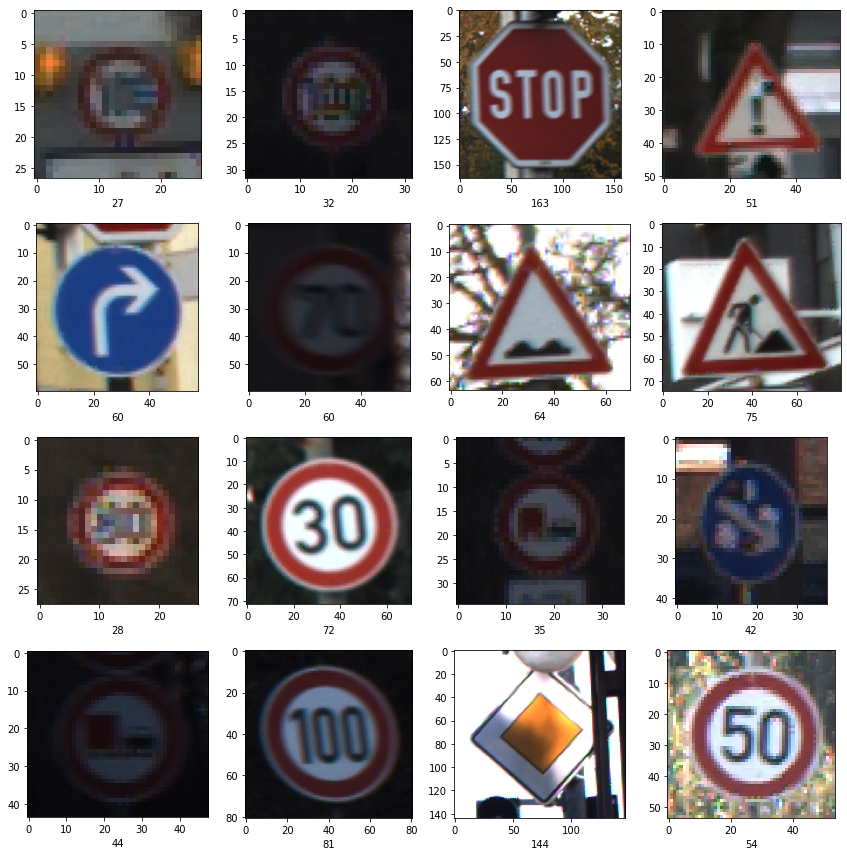

In [ ]:
# Plotting 12 images to check dataset

plt.figure(figsize=(12,12))
path = 'traffic_sign_dataset/Test'

for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()#make the image to be shown closely
  rand_img = imread(path + '/' + random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1] , fontsize = 10 )
  plt.xlabel(rand_img.shape[0] , fontsize = 10 )

For further processing we will require the images of same dimension. So, we will start storing the dimension of all the images from training dataset from all 43 classes.


---



---




In [ ]:
# As size of images are different we have to make them equal so we will take mean of dimanesions
dim1 = []
dim2 = []

for i in range(0,43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

In [ ]:
#Printing mean dimension of images

print("Dimension 1 Mean : ",np.mean(dim1), " Dimension 2 Mean : ",np.mean(dim2))

Dimension 1 Mean :  50.328929582493814  Dimension 2 Mean :  50.83587951745773


Scalling images 


---
Now we will reshape the images into (50,50) and also store their label ids.



---



In [ ]:
images = []
lable_id = []

for i in range(43):
  lables = 'traffic_sign_dataset/Train' + '/{0}'.format(i)   #"2 + 2 = {0}".format(4)"
  image_path = os.listdir(lables)
  for x in image_path : 
    img = Image.open(lables + '/' + x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)
    lable_id.append(i)


Make images to numpy array


---



---



In [ ]:
images = np.array(images)
images = images/255

Storing the label ids into numpy array and printing the shape. Here we can observe that their are 39209 label ids

---



---



In [ ]:
lable_id = np.array(lable_id)
lable_id.shape

(39209,)

Checking the shape of the images. Here we can see that their are 39209 images with a shape of (50,50,3.)




---



---




In [ ]:
images.shape

# it shows that we have 39209 images with 50*50 pixel and last boundery is for RGB 


(39209, 50, 50, 3)

Cheking data for being enough 


---



---



In [ ]:
lable_counts = pd.DataFrame(lable_id).value_counts()
lable_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

Use **train_test_split** for splitting train and test data


---



---



In [ ]:
x_train , x_val , y_train , y_val = train_test_split(images, lable_id , test_size = 0.2 , random_state = 42 )

One_Hot_Encoding 


---



---



In [ ]:
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

Making our model for training

Defining the model architecture. In this we will define all the layers with their input shape kernel size, activation, etc.

---



In [ ]:
model = Sequential()

model.add(Conv2D(filters=64 , kernel_size= (3,3), input_shape = x_train.shape[1:] , activation = 'relu' , padding= 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters= 64 , kernel_size=(3,3) , activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43,activation='softmax'))

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy' , optimizer= 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0

Now we will fit the model and observe how our is getting trained on each epoch.



---



---



In [ ]:
model.fit(x_train , y_train , epochs=15 , batch_size=128 , validation_data=(x_val , y_val) , verbose=1)


Epoch 1/15
246/246 [==============================] - 40s 33ms/step - loss: 2.4062 - accuracy: 0.3383 - val_loss: 1.1224 - val_accuracy: 0.7309
Epoch 2/15
246/246 [==============================] - 7s 30ms/step - loss: 1.0457 - accuracy: 0.6760 - val_loss: 0.4249 - val_accuracy: 0.9063
Epoch 3/15
246/246 [==============================] - 7s 30ms/step - loss: 0.6563 - accuracy: 0.7907 - val_loss: 0.2340 - val_accuracy: 0.9573
Epoch 4/15
246/246 [==============================] - 7s 30ms/step - loss: 0.5091 - accuracy: 0.8351 - val_loss: 0.1726 - val_accuracy: 0.9661
Epoch 5/15
246/246 [==============================] - 7s 30ms/step - loss: 0.4171 - accuracy: 0.8667 - val_loss: 0.1371 - val_accuracy: 0.9751
Epoch 6/15
246/246 [==============================] - 7s 30ms/step - loss: 0.3592 - accuracy: 0.8839 - val_loss: 0.1244 - val_accuracy: 0.9788
Epoch 7/15
246/246 [==============================] - 7s 30ms/step - loss: 0.3181 - accuracy: 0.8980 - val_loss: 0.0900 - val_accuracy: 0.983

Observe how our is getting trained on each epoch


---



---



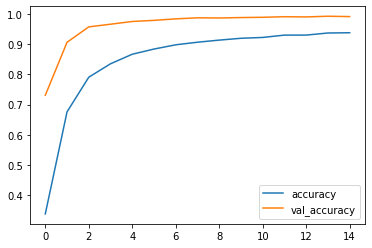

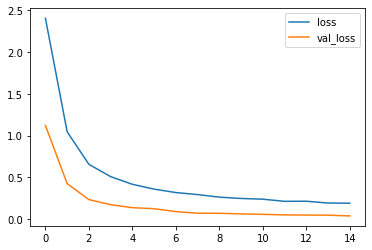

In [ ]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy' , 'val_accuracy']].plot()
evaluation[['loss','val_loss']].plot()

Creating the variable which has path of test dataset. As we downloded the dataset we found out that their is a GT-final_test.csv file in the test images folder which cannot be processed. So, we will remove that file.


---


---




In [ ]:
test_path = 'traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv

Next step would we creating a function to resize the test images converting them into a numpy array and normalize them.



---



---



In [ ]:
from PIL import Image

def scaling(test_images , test_path):
  images = []

  image_path = test_images

  for x in image_path:
    img = Image.open(test_path + '/' + x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)

  images = np.array(images)

  images = images/255

  return images  

Calling the above created function on test images.


---



---



In [ ]:
test_images = scaling(sorted(os.listdir(test_path)) , test_path)

Next we will read label ids from Test.csv and store the values of the class id in y_test variable.

---



---





In [ ]:
y_test = TestCSV['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

link textNow we will use the model to make predictions on our test images and save them in y_pred.


---



---



In [ ]:
y_pred = np.argmax(model.predict(test_images), axis=-1)
y_pred

array([16,  1, 38, ..., 38,  7, 10])

Storing the labels according to the image classes.


---



---



In [ ]:
# Storing all lables
all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

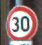

In [ ]:
# Visualize test image
img = Image.open(test_path + '/00001.png')
img

Finding out original label for the image above.

---



---



In [ ]:
# Original label
print("Original label : ",all_lables[y_test[1]])

Original label :  Speed limit (30km/h)


Finding out the predicted label for the image above.

---



---



In [ ]:
# Predicted label
print("Predicted label : ",all_lables[y_pred[1]])

Predicted label :  Speed limit (30km/h)
